In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('./train.csv')

In [4]:
# First, lets check our data set : 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Lets see the summary statistics of data set
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# There are 176 Missing Age values. 
# Can check the same with :
#pd.isnull(df['Age'])

In [7]:
#Fill the null value by mean
meanAge = np.mean(df.Age)
df.Age = df.Age.fillna(meanAge)

In [8]:
#Checking if the values are filled or not
#pd.isnull(df['Age'])

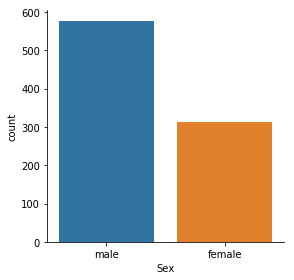

In [9]:
#Lets find out how many male and female passenger broaded ship
sns.factorplot('Sex',data=df, kind="count")

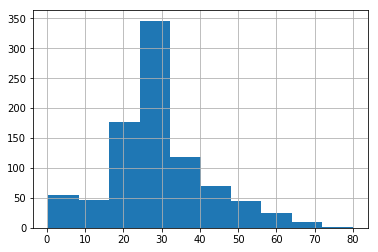

In [10]:
# 2. Lets plot the ages of the passengers
df['Age'].hist() 

In [11]:
# Most passengers were form the age group of 20 - 50

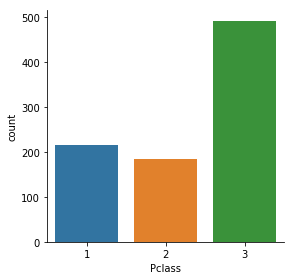

In [12]:
# 3. Lets find out was the class of passengers
sns.factorplot('Pclass', data=df, kind="count")

In [13]:
# Seems most passengers were from 3rd class

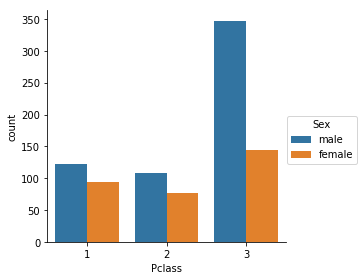

In [14]:
# Lets plot gender and class together
sns.factorplot("Pclass", hue="Sex",data=df, kind="count")

In [15]:
# Plot shows more males in 3rd class..!!

In [16]:
# lets find the no of children in titanic

In [17]:
# Function to determine whether a passenger is child:
def person_cat(passenger):
    
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex
    

In [18]:
df['person'] = df[['Age','Sex']].apply(person_cat,axis=1)

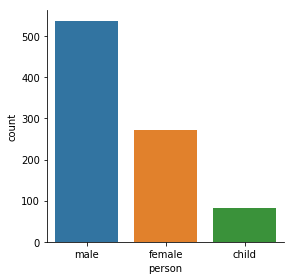

In [19]:
sns.factorplot("person", data=df, kind="count")

In [20]:
# lets see the exact count of children : 
df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [21]:
# lets find out which deck were the passengers on

In [22]:
cab=df['Cabin']

In [23]:
cs = df[['Cabin', 'Survived', 'Pclass']].dropna()

In [24]:
cs['Cabclass']=cs['Cabin'].str[:1]

In [25]:
cs.head()

,Cabin,Survived,Pclass,Cabclass
1,C85,1,1,C
3,C123,1,1,C
6,E46,0,1,E
10,G6,1,3,G
11,C103,1,1,C


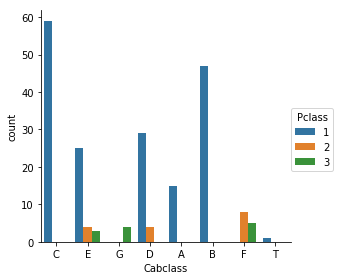

In [26]:
sns.factorplot('Cabclass', data=cs, hue = 'Pclass', kind = 'count')

In [27]:
# lets find out who was alone and who had company

In [28]:
df['Company'] = df['SibSp']+ df['Parch']

In [29]:
df['Company'].loc[df['Company'] >0] = 'With Family'
df['Company'].loc[df['Company'] == 0] = 'Alone'

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Company
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


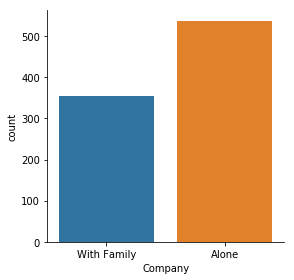

In [31]:
sns.factorplot('Company', data=df, kind="count")

In [32]:
# lets see where did the passengers boarded the Titanic

In [33]:
pd.unique(df.Embarked.ravel()) # check no of classes

array(['S', 'C', 'Q', nan], dtype=object)

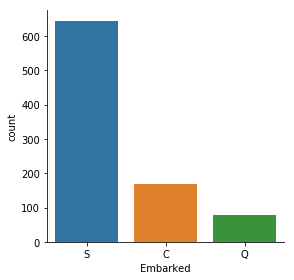

In [34]:
# count NA values
sns.factorplot("Embarked", data=df, kind="count")

In [35]:
# These stand for Cherbourg, Queenstown,and Southhampton.
# Plot shows max no of passengers embarked from Southhampton.
# Lets plot the class of passengers and city

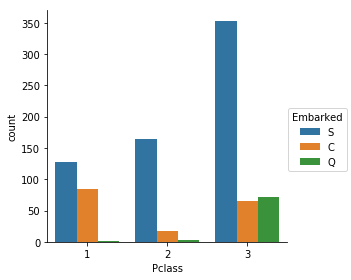

In [36]:
sns.factorplot("Pclass", data=df, hue="Embarked",legend=True, kind="count")

In [37]:
# Now that we have enough info about passengers, Lets try to find out the factors that helped passengers in surviving 
# 1. Gender
# 2. Passenger Class
# 3. City from which passengers embarked
# 4. Company, i.e did having a family member increase the odds of surviving the crash?
# 5. Deck - Did the deck have an effect on the passengers survival rate? 

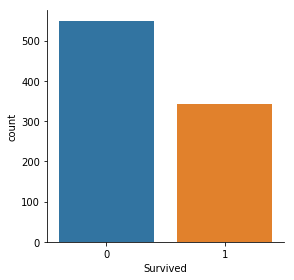

In [38]:
# 1st lets see how many survived and how many did not
sns.factorplot('Survived', data=df, kind="count")

In [39]:
# 0 - No  1- Yes
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [40]:
# This data set contains information of 891 passengers. Out of them, 342 survided

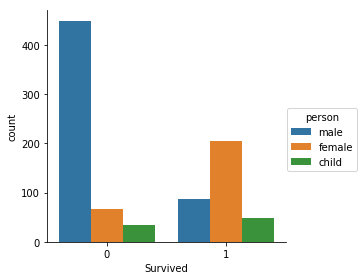

In [41]:
sns.factorplot('Survived', data=df, kind="count", hue='person')

In [42]:
# More males died ; more women and children were saved

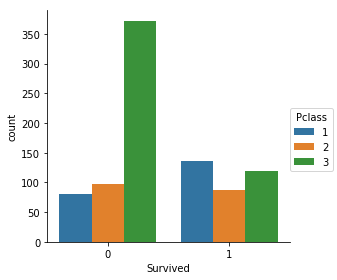

In [43]:
# Lets see whether passenger class is linked to survival rate
sns.factorplot("Survived", data=df, hue="Pclass",legend=True, kind="count")

In [44]:
# Plot suggests most 3rd class passengers did not survive 
# Lets plot survived, class and city

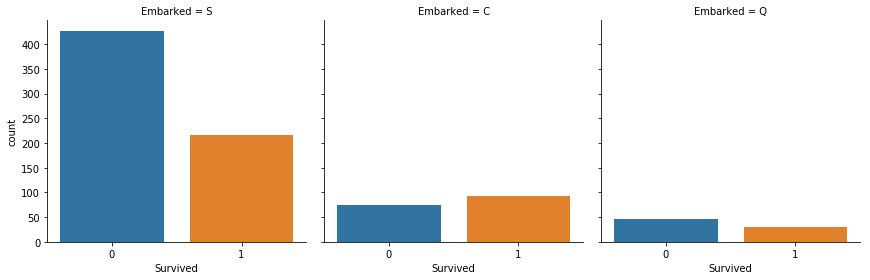

In [45]:
# survived vs city
sns.factorplot('Survived',data=df, kind="count", col= "Embarked", col_wrap=3)

In [46]:
# Cherbourg, Queenstown, Southhampton. 

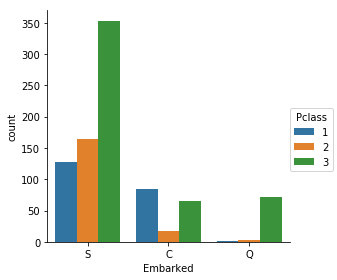

In [47]:
sns.factorplot('Embarked', data = df, hue='Pclass', kind='count')

In [48]:
# From above two plots, we can infer that more passengers who boarded from Queenstown and  Southhampton died. Probably because most
# passengers who embarked from these cities were 3rd class passengers. On the contrary, there were more 2nd and 1st class passengers 
# from Cherbourg

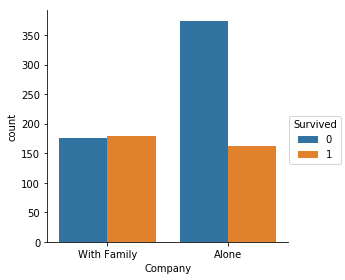

In [49]:
# Lets check whether having family member helped in survival
sns.factorplot('Company',data=df, hue = 'Survived', kind = 'count')

In [50]:
# Plot shows that passengers without company (i.e neither siblings and parents/children ) had low survival rate. 

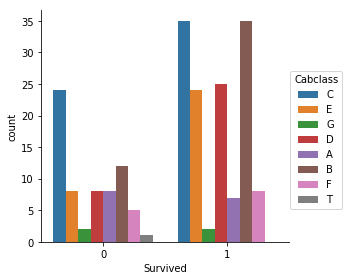

In [51]:
# Lets check whether cabin class is related to the survival
sns.factorplot('Survived', data=cs, hue = 'Cabclass', kind="count")

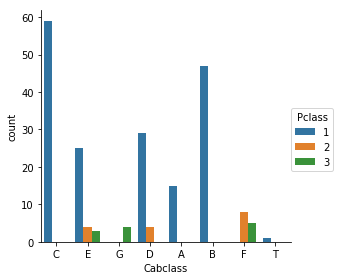

In [52]:
# Lets again go back to the plot depicting Class of these decks
sns.factorplot('Cabclass', data=cs, hue = 'Pclass', kind = 'count')

In [53]:
# Looking at the class accociated with these cabins we can infer that passengers from Cabclass C,E,B and D survived more because
# they belonged to 1st class.

In [54]:
#Outcome
#1.More men died ; more women and children were rescued
#2.Most passengers belonging to the third class didn’t survive
#3.More passengers who boarded from Queenstown and Southhampton died, compared to Cherbourg. Probably because most passengers who embarked from these cities were 3rd class travelers. On the contrary, there were more 2nd and 1st class passengers from Cherbourg that survived.
#4.Passengers without family on-board (i.e neither siblings nor parents/children ) had low survival rate.
#5.Passengers from Cabin class C,E,B and D survived more because they were 1st class passengers.